In [1]:
import pandas as pd

In [16]:
df = pd.read_csv("../data/raw/data.csv")

In [10]:
df.shape

(25160, 7)

In [12]:
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [11]:
df.describe

<bound method NDFrame.describe of       Company        Date Close/Last    Volume      Open       High       Low
0        AAPL  07/17/2023    $193.99  50520160   $191.90    $194.32   $191.81
1        AAPL  07/14/2023    $190.69  41616240   $190.23  $191.1799   $189.63
2        AAPL  07/13/2023    $190.54  41342340   $190.50    $191.19   $189.78
3        AAPL  07-12-2023    $189.77  60750250   $189.68    $191.70   $188.47
4        AAPL  07-11-2023    $188.08  46638120   $189.16    $189.30   $186.60
...       ...         ...        ...       ...       ...        ...       ...
25155    NFLX  07/24/2013   $34.4714  33395351  $35.6743   $36.0357  $34.3143
25156    NFLX  07/23/2013   $35.7514  76792963  $35.9143   $37.4621  $35.1714
25157    NFLX  07/22/2013   $37.4228  44791095  $38.1214   $38.3928  $36.7314
25158    NFLX  07/19/2013   $37.7966  18098750  $38.2043   $38.2784  $37.5971
25159    NFLX  07/18/2013   $38.0586  20418642  $38.6157   $38.6157  $37.7143

[25160 rows x 7 columns]>

In [18]:
df['Date'] = df['Date'].str.replace('-', '/')

In [19]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Close/Last'] = df['Close/Last'].str.replace('$', '').astype(float)

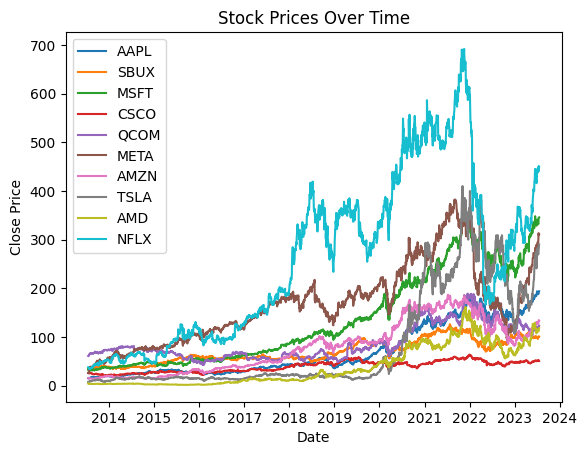

In [20]:
import matplotlib.pyplot as plt

companies = df['Company'].unique()
for company in companies:
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close/Last'], label=company)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices Over Time')
plt.show()

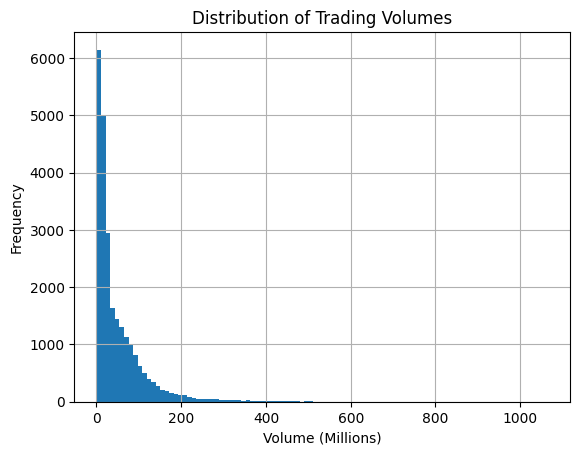

In [30]:
(df['Volume'] / 1e6).hist(bins=100)
plt.xlabel('Volume (Millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volumes')
plt.show()

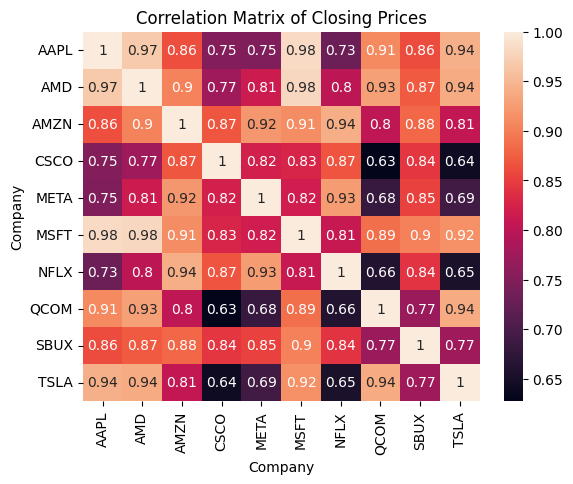

In [31]:
pivot_df = df.pivot(index='Date', columns='Company', values='Close/Last')
correlation = pivot_df.corr()

import seaborn as sns

sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix of Closing Prices')
plt.show()

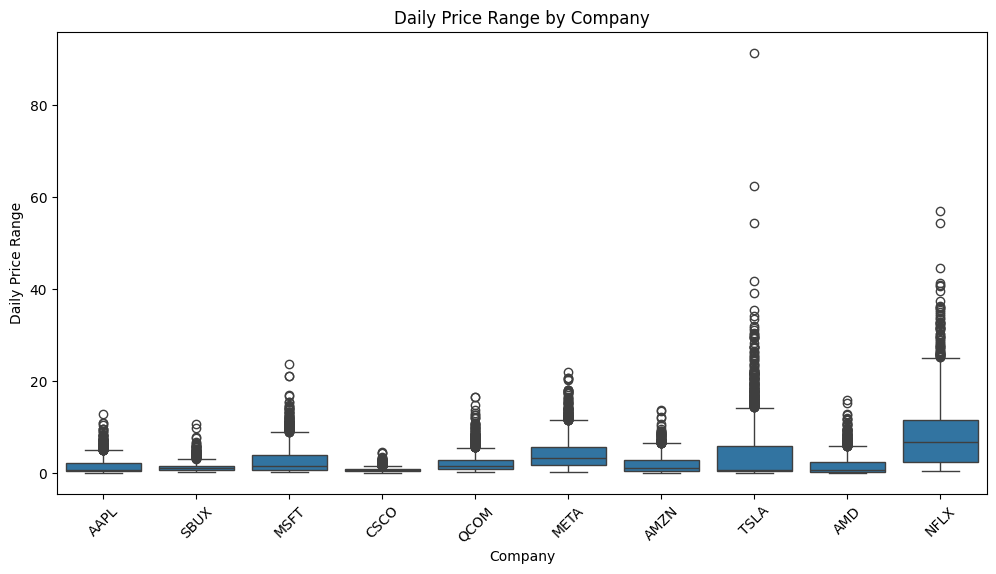

In [32]:
df['Price_Range'] = df['High'].str.replace('$', '').astype(float) - df['Low'].str.replace('$', '').astype(float)

# Plot boxplot of daily price range by company
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Company', y='Price_Range')
plt.xlabel('Company')
plt.ylabel('Daily Price Range')
plt.title('Daily Price Range by Company')
plt.xticks(rotation=45)
plt.show()

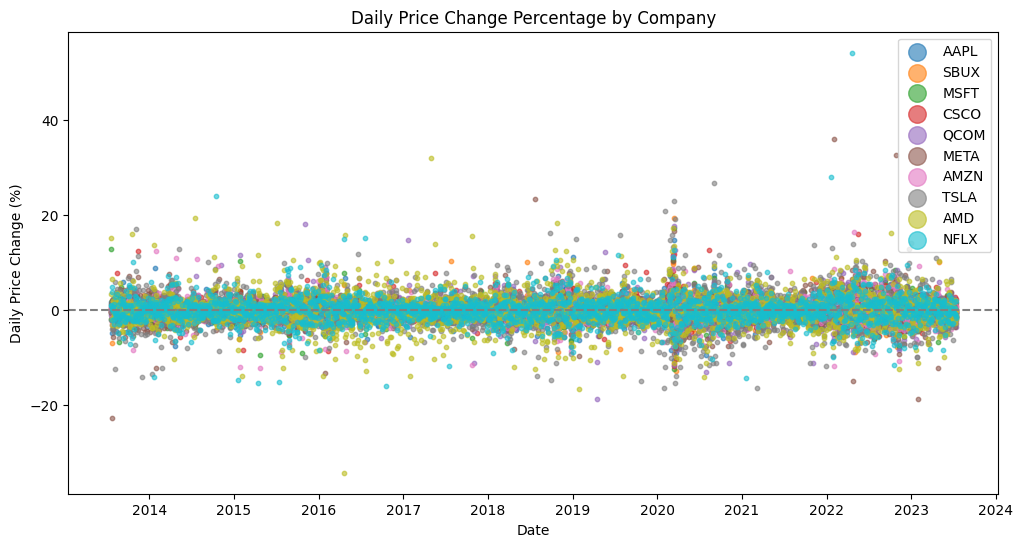

In [35]:
df['Daily_Price_Change'] = df.groupby('Company')['Close/Last'].pct_change() * 100  

plt.figure(figsize=(12, 6))
for company in companies:
    company_data = df[df['Company'] == company]
    plt.scatter(company_data['Date'], company_data['Daily_Price_Change'], label=company, alpha=0.6, s=10)

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Daily Price Change (%)')
plt.title('Daily Price Change Percentage by Company')
plt.legend(loc='upper right', markerscale=4)
plt.show()

In [37]:
df.to_csv('../data/processed/cleaned_data.csv', index=False)